# Classificação de Qualidade de Vinhos - SVM

- Possuimos 2 datasets com vinhos tintos e brancos do norte de Portugal. O objetivo é fazer uma previsão da qualidade do vinho baseado nos testes químicos feitos
- Usaremos SVM para classificar os vinhos.

In [2]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
import pickle


In [3]:
with open('redwine.pkl', 'rb') as f:
    X_redwine_train, y_redwine_train, X_redwine_test, y_redwine_test = pickle.load(f)

In [4]:
X_redwine_train.shape, y_redwine_train.shape

((1279, 11), (1279,))

In [5]:
X_redwine_test.shape, y_redwine_test.shape

((320, 11), (320,))

# Algoritmo SVM

In [63]:
svm_redwine = SVC(kernel='rbf', C=2.3)
svm_redwine.fit(X_redwine_train, y_redwine_train)

SVC(C=2.3)

In [64]:
predictions = svm_redwine.predict(X_redwine_test)
predictions

array([5, 5, 7, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 4, 6, 6, 7, 5, 6, 5, 6, 5,
       6, 6, 5, 5, 5, 7, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5, 7, 7, 7,
       6, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 5, 7, 6, 5, 6, 6, 6, 5, 6,
       5, 5, 7, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 7, 6, 5, 6, 6, 6, 6, 6, 5,
       5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 7, 6, 6, 6, 5, 5, 5, 5, 6, 5,
       6, 5, 6, 5, 6, 6, 6, 7, 6, 6, 5, 6, 5, 5, 6, 7, 5, 5, 6, 7, 5, 5,
       6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 7, 6, 5, 6, 5, 5, 5,
       6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 5, 7, 6, 6,
       5, 7, 6, 5, 5, 7, 6, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 5, 5,
       5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5,
       5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 6, 7, 6, 6, 6, 6,
       5, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 7, 6, 6, 5, 6,
       5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 7, 6, 6, 5, 6, 7, 5, 7, 6, 6, 6, 5,
       5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 5, 6,

In [65]:
y_redwine_test

array([6, 5, 7, 6, 5, 6, 5, 6, 4, 5, 5, 5, 6, 5, 6, 6, 7, 5, 5, 4, 7, 6,
       6, 4, 6, 5, 5, 7, 5, 6, 5, 6, 5, 6, 7, 7, 5, 6, 6, 7, 5, 7, 6, 6,
       5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6,
       5, 5, 6, 6, 6, 6, 4, 6, 5, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5,
       5, 5, 5, 6, 4, 5, 7, 6, 6, 5, 6, 5, 8, 6, 6, 6, 5, 5, 5, 5, 7, 5,
       6, 5, 7, 5, 6, 6, 6, 7, 6, 6, 5, 7, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6,
       6, 6, 6, 5, 6, 5, 8, 5, 6, 5, 6, 5, 4, 6, 7, 6, 5, 6, 6, 5, 5, 5,
       6, 6, 3, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 8, 5, 6,
       6, 7, 7, 5, 5, 7, 5, 6, 6, 4, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5,
       5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 7, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 6, 6, 6, 3, 6, 5, 5, 7, 6, 7, 6, 6, 7, 7, 6, 5, 6,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 7, 5, 6, 5, 6,
       5, 4, 5, 5, 6, 7, 6, 5, 5, 4, 5, 6, 7, 6, 6, 7, 5, 7, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6,

In [66]:
print(f'Precisão de acertos: {accuracy_score(y_redwine_test, predictions):.2%}')
# kernel poly = 65.31
# kernel rbf = 65.62 (C=2.3)
# kernel linear = 60
# kernel sigmoid = 56.88

Precisão de acertos: 65.62%


0.65625

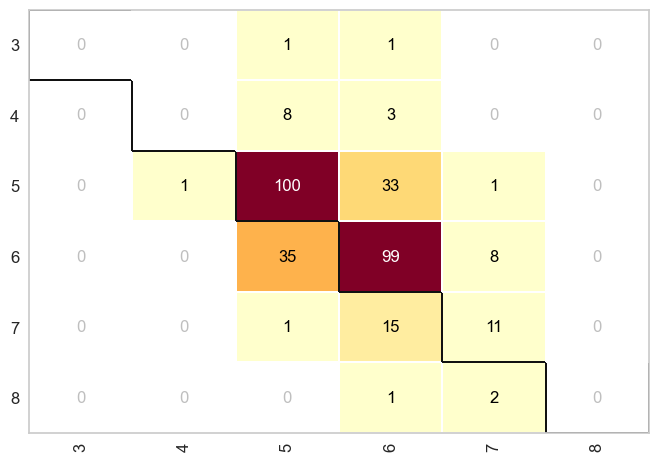

In [68]:
cm = ConfusionMatrix(svm_redwine)
cm.fit(X_redwine_train, y_redwine_train)
cm.score(X_redwine_test, y_redwine_test)

In [73]:
print(classification_report(y_redwine_test, predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.69      0.74      0.71       135
           6       0.65      0.70      0.67       142
           7       0.50      0.41      0.45        27
           8       0.00      0.00      0.00         3

    accuracy                           0.66       320
   macro avg       0.31      0.31      0.31       320
weighted avg       0.62      0.66      0.64       320



c:\Users\luke\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\luke\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\luke\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### O algoritmo de SVM não se mostrou muito eficiente para a solução deste problema, com uma precisão de apenas 65.62%.
